# **Import**

In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import shap

# **Data Load**

In [ ]:
cd /content/drive/MyDrive/[Projects]/Dacon/운수종사자 인지적 특성 데이터를 활용한 교통사고 위험 예측 AI 경진대회/Data

/content/drive/MyDrive/[Projects]/Dacon/운수종사자 인지적 특성 데이터를 활용한 교통사고 위험 예측 AI 경진대회/Data


In [ ]:
train_a = pd.read_csv('./train_a.csv')
train_a.head()

In [ ]:
train_a = train_a.drop('Test_y', axis=1)

In [ ]:
train_a.rename(columns={
    'Test_x': 'Test',

    'A1-1': 'A1_Direction',
    'A1-2': 'A1_Speed',
    'A1-3': 'A1_Response',
    'A1-4': 'A1_ResponseTime',

    'A2-1': 'A2_Speed1',
    'A2-2': 'A2_Speed2',
    'A2-3': 'A2_Response',
    'A2-4': 'A2_ResponseTime',

    'A3-1': 'A3_ArrowSize',
    'A3-2': 'A3_ArrowPosition',
    'A3-3': 'A3_ArrowDirection',
    'A3-4': 'A3_CorrectPosition',
    'A3-5': 'A3_ResponseType',
    'A3-6': 'A3_Response',
    'A3-7': 'A3_ResponseTime',

    'A4-1': 'A4_Condition',
    'A4-2': 'A4_Color',
    'A4-3': 'A4_Response1',
    'A4-4': 'A4_Response2',
    'A4-5': 'A4_ResponseTime',

    'A5-1': 'A5_ChangeType',
    'A5-2': 'A5_Response1',
    'A5-3': 'A5_Response',

    'A6-1': 'A6_Count',

    'A7-1': 'A7_Count',

    'A8-1': 'A8_Count1',
    'A8-2': 'A8_Count2',

    'A9-1': 'A9_Count1',
    'A9-2': 'A9_Count2',
    'A9-3': 'A9_Count3',
    'A9-4': 'A9_Count4',
    'A9-5': 'A9_Count5'
}, inplace=True)

In [ ]:
train_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647241 entries, 0 to 647240
Data columns (total 38 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Test_id             647241 non-null  object
 1   Test                647241 non-null  object
 2   Label               647241 non-null  int64 
 3   PrimaryKey          647241 non-null  object
 4   Age                 647241 non-null  object
 5   TestDate            647241 non-null  int64 
 6   A1_Direction        647241 non-null  object
 7   A1_Speed            647241 non-null  object
 8   A1_Response         647241 non-null  object
 9   A1_ResponseTime     647241 non-null  object
 10  A2_Speed1           647240 non-null  object
 11  A2_Speed2           647240 non-null  object
 12  A2_Response         647240 non-null  object
 13  A2_ResponseTime     647240 non-null  object
 14  A3_ArrowSize        647240 non-null  object
 15  A3_ArrowPosition    647240 non-null  object
 16  A3

In [ ]:
train_a.to_csv('train_a_renamed.csv', index=False)

In [ ]:
train_a = pd.read_csv('./train_a_renamed.csv')
train_a = train_a.dropna()
train_a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 647237 entries, 0 to 647240
Data columns (total 38 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Test_id             647237 non-null  object
 1   Test                647237 non-null  object
 2   Label               647237 non-null  int64 
 3   PrimaryKey          647237 non-null  object
 4   Age                 647237 non-null  object
 5   TestDate            647237 non-null  int64 
 6   A1_Direction        647237 non-null  object
 7   A1_Speed            647237 non-null  object
 8   A1_Response         647237 non-null  object
 9   A1_ResponseTime     647237 non-null  object
 10  A2_Speed1           647237 non-null  object
 11  A2_Speed2           647237 non-null  object
 12  A2_Response         647237 non-null  object
 13  A2_ResponseTime     647237 non-null  object
 14  A3_ArrowSize        647237 non-null  object
 15  A3_ArrowPosition    647237 non-null  object
 16  A3_Arro

# **Features**

In [ ]:
train_a.columns

Index(['Test_id', 'Test', 'Label', 'PrimaryKey', 'Age', 'TestDate',
       'A1_Direction', 'A1_Speed', 'A1_Response', 'A1_ResponseTime',
       'A2_Speed1', 'A2_Speed2', 'A2_Response', 'A2_ResponseTime',
       'A3_ArrowSize', 'A3_ArrowPosition', 'A3_ArrowDirection',
       'A3_CorrectPosition', 'A3_ResponseType', 'A3_Response',
       'A3_ResponseTime', 'A4_Condition', 'A4_Color', 'A4_Response1',
       'A4_Response2', 'A4_ResponseTime', 'A5_ChangeType', 'A5_Response1',
       'A5_Response', 'A6_Count', 'A7_Count', 'A8_Count1', 'A8_Count2',
       'A9_Count1', 'A9_Count2', 'A9_Count3', 'A9_Count4', 'A9_Count5'],
      dtype='object')

In [ ]:
list_cols = ['A1_Direction', 'A1_Speed', 'A1_Response', 'A1_ResponseTime',
             'A2_Speed1', 'A2_Speed2', 'A2_Response', 'A2_ResponseTime',
             'A3_ArrowSize', 'A3_ArrowPosition', 'A3_ArrowDirection',
             'A3_CorrectPosition', 'A3_ResponseType', 'A3_Response', 'A3_ResponseTime',
             'A4_Condition', 'A4_Color', 'A4_Response1', 'A4_Response2', 'A4_ResponseTime',
             'A5_ChangeType', 'A5_Response1', 'A5_Response']

for col in list_cols:
    train_a[col + '_list'] = train_a[col].apply(lambda x: list(map(int, x.split(','))) if isinstance(x, str) else x)

In [ ]:
train_a['Age'] = train_a['Age'].astype(str).str.extract(r'(\d+)').astype(int)
print(train_a['Age'].head())

0    50
1    60
2    50
3    50
4    40
Name: Age, dtype: int64


In [ ]:
def compute_A1_features(row):
    # 리스트 추출
    d = row['A1_Direction_list'] or []
    s = row['A1_Speed_list'] or []
    r = row['A1_Response_list'] or []
    rt = row['A1_ResponseTime_list'] or []

    L = min(len(d), len(s), len(r), len(rt))
    if L == 0:
        return pd.Series({
            'A1_response_rate': 0,
            'A1_left_response_rate': 0,
            'A1_right_response_rate': 0,
            'A1_fast_response_rate': 0,
            'A1_mean_response_time': np.nan,
            'A1_fast_avg_rt': np.nan,
            'A1_direction_diff_rt': np.nan
        })

    d, s, r, rt = np.array(d[:L]), np.array(s[:L]), np.array(r[:L]), np.array(rt[:L])

    # 전체 응답률
    A1_response_rate = r.mean()

    # 왼쪽/오른쪽 조건 응답률
    A1_left_response_rate = r[d == 1].mean() if np.any(d == 1) else 0
    A1_right_response_rate = r[d == 2].mean() if np.any(d == 2) else 0

    # 빠름 조건(3)의 응답률
    A1_fast_response_rate = r[s == 3].mean() if np.any(s == 3) else 0

    # 평균 반응시간 (응답한 trial만)
    valid_rt = rt[r == 1]
    A1_mean_response_time = valid_rt.mean() if len(valid_rt) > 0 else np.nan

    # 빠름 조건에서의 평균 반응시간
    fast_rt = rt[(s == 3) & (r == 1)]
    A1_fast_avg_rt = fast_rt.mean() if len(fast_rt) > 0 else np.nan

    # 방향별 반응시간 차이 (left - right)
    left_rt = rt[(d == 1) & (r == 1)]
    right_rt = rt[(d == 2) & (r == 1)]
    A1_direction_diff_rt = left_rt.mean() - right_rt.mean() if len(left_rt) > 0 and len(right_rt) > 0 else np.nan

    return pd.Series({
        'A1_response_rate': A1_response_rate,
        'A1_left_response_rate': A1_left_response_rate,
        'A1_right_response_rate': A1_right_response_rate,
        'A1_fast_response_rate': A1_fast_response_rate,
        'A1_mean_response_time': A1_mean_response_time,
        'A1_fast_avg_rt': A1_fast_avg_rt,
        'A1_direction_diff_rt': A1_direction_diff_rt
    })


# 적용
a1_feats = train_a.apply(compute_A1_features, axis=1)
train_a = pd.concat([train_a, a1_feats], axis=1)

# NaN 처리: 각 컬럼 최대값으로 채우기
rt_cols = ['A1_mean_response_time', 'A1_fast_avg_rt', 'A1_direction_diff_rt']
for col in rt_cols:
    max_val = train_a[col].max(skipna=True)
    train_a[col].fillna(max_val, inplace=True)

# 결과 확인
print(train_a[['A1_response_rate','A1_left_response_rate','A1_right_response_rate',
               'A1_fast_response_rate','A1_mean_response_time','A1_fast_avg_rt','A1_direction_diff_rt']].head())


   A1_response_rate  A1_left_response_rate  A1_right_response_rate  \
0          0.000000               0.000000                0.000000   
1          0.000000               0.000000                0.000000   
2          0.000000               0.000000                0.000000   
3          0.277778               0.333333                0.222222   
4          0.000000               0.000000                0.000000   

   A1_fast_response_rate  A1_mean_response_time  A1_fast_avg_rt  \
0               0.000000                  753.0           817.0   
1               0.000000                  753.0           817.0   
2               0.000000                  753.0           817.0   
3               0.333333                  646.6           723.5   
4               0.000000                  753.0           817.0   

   A1_direction_diff_rt  
0                1585.0  
1                1585.0  
2                1585.0  
3                 -24.0  
4                1585.0  


In [ ]:
def compute_A2_features(row):
    s1 = row['A2_Speed1_list'] or []
    s2 = row['A2_Speed2_list'] or []
    r  = row['A2_Response_list'] or []
    rt = row['A2_ResponseTime_list'] or []

    L = min(len(s1), len(s2), len(r), len(rt))
    if L == 0:
        return pd.Series({
            'A2_response_rate': 0,
            'A2_slow_to_fast_rt_diff': np.nan,
            'A2_correct_ratio_by_speed': np.nan,
            'A2_mean_response_time': np.nan
        })

    s1, s2, r, rt = np.array(s1[:L]), np.array(s2[:L]), np.array(r[:L]), np.array(rt[:L])

    # 전체 응답률
    A2_response_rate = r.mean()

    # 느림/빠름 인덱스 (가정: 1=느림, 2=빠름)
    slow_idx = np.where(s1 == 1)[0]
    fast_idx = np.where(s1 == 2)[0]

    # 느림→빠름 조건 반응시간 차이
    slow_rt = rt[slow_idx & (r[slow_idx]==1)] if len(slow_idx) > 0 else np.array([])
    fast_rt = rt[fast_idx & (r[fast_idx]==1)] if len(fast_idx) > 0 else np.array([])
    A2_slow_to_fast_rt_diff = fast_rt.mean() - slow_rt.mean() if len(slow_rt) > 0 and len(fast_rt) > 0 else np.nan

    # 속도 조건별 응답률 비교 (fast/slow)
    slow_resp = r[slow_idx].mean() if len(slow_idx) > 0 else np.nan
    fast_resp = r[fast_idx].mean() if len(fast_idx) > 0 else np.nan
    if not np.isnan(slow_resp) and not np.isnan(fast_resp) and slow_resp != 0:
        A2_correct_ratio_by_speed = fast_resp / slow_resp
    else:
        A2_correct_ratio_by_speed = np.nan

    # 전체 평균 반응시간 (응답한 trial만)
    valid_rt = rt[r == 1]
    A2_mean_response_time = valid_rt.mean() if len(valid_rt) > 0 else np.nan

    return pd.Series({
        'A2_response_rate': A2_response_rate,
        'A2_slow_to_fast_rt_diff': A2_slow_to_fast_rt_diff,
        'A2_correct_ratio_by_speed': A2_correct_ratio_by_speed,
        'A2_mean_response_time': A2_mean_response_time
    })

# 적용
a2_feats = train_a.apply(compute_A2_features, axis=1)
train_a = pd.concat([train_a, a2_feats], axis=1)

# NaN 처리: 각 컬럼 최대값으로 채우기
rt_cols = ['A2_slow_to_fast_rt_diff', 'A2_correct_ratio_by_speed', 'A2_mean_response_time']
for col in rt_cols:
    max_val = train_a[col].max(skipna=True)
    train_a[col].fillna(max_val, inplace=True)

# 결과 확인
print(train_a[['A2_response_rate','A2_slow_to_fast_rt_diff','A2_correct_ratio_by_speed','A2_mean_response_time']].head())

   A2_response_rate  A2_slow_to_fast_rt_diff  A2_correct_ratio_by_speed  \
0               0.0                      0.0                        6.0   
1               0.0                      0.0                        6.0   
2               0.0                      0.0                        6.0   
3               0.0                      0.0                        6.0   
4               0.0                      0.0                        6.0   

   A2_mean_response_time  
0                  999.0  
1                  999.0  
2                  999.0  
3                  999.0  
4                  999.0  


In [ ]:
def compute_A3_features(row):
    arrow_size     = row['A3_ArrowSize_list'] or []
    arrow_pos      = row['A3_ArrowPosition_list'] or []
    arrow_dir      = row['A3_ArrowDirection_list'] or []
    correct_pos    = row['A3_CorrectPosition_list'] or []
    resp_type      = row['A3_ResponseType_list'] or []
    resp           = row['A3_Response_list'] or []
    rt             = row['A3_ResponseTime_list'] or []

    L = min(len(arrow_size), len(arrow_pos), len(arrow_dir), len(correct_pos), len(resp_type), len(resp), len(rt))
    if L == 0:
        return pd.Series({
            'A3_valid_accuracy': np.nan,
            'A3_invalid_accuracy': np.nan,
            'A3_total_accuracy': np.nan,
            'A3_valid_rt': np.nan,
            'A3_invalid_rt': np.nan,
            'A3_correct_rt': np.nan,
            'A3_incorrect_rt': np.nan,
            'A3_accuracy_gap': np.nan
        })

    # 배열로 변환
    arrow_size, arrow_pos, arrow_dir = np.array(arrow_size[:L]), np.array(arrow_pos[:L]), np.array(arrow_dir[:L])
    correct_pos, resp_type, resp, rt = np.array(correct_pos[:L]), np.array(resp_type[:L]), np.array(resp[:L]), np.array(rt[:L])

    # valid / invalid trial 인덱스 (예: 1=valid, 3=invalid)
    valid_idx = np.where(resp_type == 1)[0]
    invalid_idx = np.where(resp_type == 3)[0]

    # 정확도 계산
    A3_valid_accuracy = (resp[valid_idx] == 1).mean() if len(valid_idx) > 0 else np.nan
    A3_invalid_accuracy = (resp[invalid_idx] == 1).mean() if len(invalid_idx) > 0 else np.nan
    A3_total_accuracy = (resp == 1).mean() if len(resp) > 0 else np.nan

    # 반응시간 계산 (응답한 trial만)
    A3_valid_rt = rt[valid_idx].mean() if len(valid_idx) > 0 else np.nan
    A3_invalid_rt = rt[invalid_idx].mean() if len(invalid_idx) > 0 else np.nan
    A3_correct_rt = rt[resp == 1].mean() if np.any(resp == 1) else np.nan
    A3_incorrect_rt = rt[resp == 0].mean() if np.any(resp == 0) else np.nan

    # valid / invalid 정확도 차이
    if not np.isnan(A3_valid_accuracy) and not np.isnan(A3_invalid_accuracy):
        A3_accuracy_gap = A3_valid_accuracy - A3_invalid_accuracy
    else:
        A3_accuracy_gap = np.nan

    return pd.Series({
        'A3_valid_accuracy': A3_valid_accuracy,
        'A3_invalid_accuracy': A3_invalid_accuracy,
        'A3_total_accuracy': A3_total_accuracy,
        'A3_valid_rt': A3_valid_rt,
        'A3_invalid_rt': A3_invalid_rt,
        'A3_correct_rt': A3_correct_rt,
        'A3_incorrect_rt': A3_incorrect_rt,
        'A3_accuracy_gap': A3_accuracy_gap
    })


# 적용
a3_feats = train_a.apply(compute_A3_features, axis=1)
train_a = pd.concat([train_a, a3_feats], axis=1)

# NaN 처리: 반응시간 관련 컬럼 최대값으로 채우기
rt_cols = ['A3_valid_rt', 'A3_invalid_rt', 'A3_correct_rt', 'A3_incorrect_rt']
for col in rt_cols:
    max_val = train_a[col].max(skipna=True)
    train_a[col].fillna(max_val, inplace=True)

# 결과 확인
print(train_a[['A3_valid_accuracy','A3_invalid_accuracy','A3_total_accuracy',
               'A3_valid_rt','A3_invalid_rt','A3_correct_rt','A3_incorrect_rt','A3_accuracy_gap']].head())

   A3_valid_accuracy  A3_invalid_accuracy  A3_total_accuracy  A3_valid_rt  \
0                0.0                  0.0                0.0   728.833333   
1                0.0                  0.0                0.0  1083.791667   
2                0.0                  0.0                0.0   728.833333   
3                0.0                  0.0                0.0   712.416667   
4                0.0                  0.0                0.0   693.208333   

   A3_invalid_rt  A3_correct_rt  A3_incorrect_rt  A3_accuracy_gap  
0    1092.375000         2577.0        819.71875              0.0  
1    1015.250000         2577.0       1066.65625              0.0  
2    1092.375000         2577.0        819.71875              0.0  
3    1291.142857         2577.0        874.12500              0.0  
4    1202.750000         2577.0        820.59375              0.0  


In [ ]:
# A3 결측치 최대값으로 채우기
for col in ['A3_valid_accuracy','A3_invalid_accuracy','A3_accuracy_gap']:
    max_val = train_a[col].max()
    train_a[col].fillna(max_val, inplace=True)

In [ ]:
def compute_A4_features(row):
    condition = row['A4_Condition_list'] or []
    resp1     = row['A4_Response1_list'] or []
    resp2     = row['A4_Response2_list'] or []
    rt        = row['A4_ResponseTime_list'] or []

    L = min(len(condition), len(resp1), len(resp2), len(rt))
    if L == 0:
        return pd.Series({
            'A4_congruent_accuracy': np.nan,
            'A4_incongruent_accuracy': np.nan,
            'A4_accuracy_gap': np.nan,
            'A4_mean_rt_con': np.nan,
            'A4_mean_rt_incon': np.nan,
            'A4_rt_gap': np.nan,
            'A4_response_rate': 0
        })

    condition, resp1, resp2, rt = np.array(condition[:L]), np.array(resp1[:L]), np.array(resp2[:L]), np.array(rt[:L])

    # 응답이 있는 trial만
    valid_idx = np.where((resp1 != -1) & (resp2 != -1))[0]  # -1 등으로 결측 없음 가정
    response_rate = len(valid_idx)/L if L>0 else 0

    # congruent / incongruent trial
    con_idx = valid_idx[condition[valid_idx] == 1]
    incon_idx = valid_idx[condition[valid_idx] == 2]

    # 정확도 계산 (resp1==1이 정답)
    con_acc = (resp1[con_idx] == 1).mean() if len(con_idx) > 0 else np.nan
    incon_acc = (resp1[incon_idx] == 1).mean() if len(incon_idx) > 0 else np.nan
    acc_gap = con_acc - incon_acc if not np.isnan(con_acc) and not np.isnan(incon_acc) else np.nan

    # 반응시간 계산
    mean_rt_con = rt[con_idx].mean() if len(con_idx) > 0 else np.nan
    mean_rt_incon = rt[incon_idx].mean() if len(incon_idx) > 0 else np.nan
    rt_gap = mean_rt_incon - mean_rt_con if not np.isnan(mean_rt_con) and not np.isnan(mean_rt_incon) else np.nan

    return pd.Series({
        'A4_congruent_accuracy': con_acc,
        'A4_incongruent_accuracy': incon_acc,
        'A4_accuracy_gap': acc_gap,
        'A4_mean_rt_con': mean_rt_con,
        'A4_mean_rt_incon': mean_rt_incon,
        'A4_rt_gap': rt_gap,
        'A4_response_rate': response_rate
    })


# 적용
a4_feats = train_a.apply(compute_A4_features, axis=1)
train_a = pd.concat([train_a, a4_feats], axis=1)

# NaN 처리: 반응시간 관련 컬럼 최대값으로 채우기
rt_cols = ['A4_mean_rt_con', 'A4_mean_rt_incon', 'A4_rt_gap']
for col in rt_cols:
    max_val = train_a[col].max(skipna=True)
    train_a[col].fillna(max_val, inplace=True)

# 결과 확인
print(train_a[['A4_congruent_accuracy','A4_incongruent_accuracy','A4_accuracy_gap',
               'A4_mean_rt_con','A4_mean_rt_incon','A4_rt_gap','A4_response_rate']].head())

   A4_congruent_accuracy  A4_incongruent_accuracy  A4_accuracy_gap  \
0                  1.000                      1.0            0.000   
1                  0.975                      1.0           -0.025   
2                  1.000                      1.0            0.000   
3                  1.000                      1.0            0.000   
4                  0.975                      1.0           -0.025   

   A4_mean_rt_con  A4_mean_rt_incon  A4_rt_gap  A4_response_rate  
0         579.075           565.900    -13.175               1.0  
1         529.925           571.175     41.250               1.0  
2         579.075           565.900    -13.175               1.0  
3         597.675           605.375      7.700               1.0  
4         596.225           622.550     26.325               1.0  


In [ ]:
def compute_A5_features(row):
    change_type = row['A5_ChangeType_list'] or []
    resp1       = row['A5_Response1_list'] or []
    resp2       = row['A5_Response_list'] or []  # 혹시 필요 시
    L = min(len(change_type), len(resp1))
    if L == 0:
        return pd.Series({
            'A5_accuracy_non_change': np.nan,
            'A5_accuracy_pos_change': np.nan,
            'A5_accuracy_color_change': np.nan,
            'A5_accuracy_shape_change': np.nan,
            'A5_accuracy_var': np.nan
        })

    change_type = np.array(change_type[:L])
    resp1 = np.array(resp1[:L])

    # 각 조건별 인덱스
    idx_non_change  = np.where(change_type == 1)[0]
    idx_pos_change  = np.where(change_type == 2)[0]
    idx_color_change = np.where(change_type == 3)[0]
    idx_shape_change = np.where(change_type == 4)[0]

    # 정확도 계산 (1=정답)
    acc_non = (resp1[idx_non_change] == 1).mean() if len(idx_non_change) > 0 else np.nan
    acc_pos = (resp1[idx_pos_change] == 1).mean() if len(idx_pos_change) > 0 else np.nan
    acc_color = (resp1[idx_color_change] == 1).mean() if len(idx_color_change) > 0 else np.nan
    acc_shape = (resp1[idx_shape_change] == 1).mean() if len(idx_shape_change) > 0 else np.nan

    # 변화 유형 간 정확도 분산
    acc_list = [acc_non, acc_pos, acc_color, acc_shape]
    acc_var = np.nanvar(acc_list)  # NaN 자동 무시

    return pd.Series({
        'A5_accuracy_non_change': acc_non,
        'A5_accuracy_pos_change': acc_pos,
        'A5_accuracy_color_change': acc_color,
        'A5_accuracy_shape_change': acc_shape,
        'A5_accuracy_var': acc_var
    })

# 적용
a5_feats = train_a.apply(compute_A5_features, axis=1)
train_a = pd.concat([train_a, a5_feats], axis=1)

# NaN 처리: 정확도 관련 컬럼은 최대값으로 채우기
acc_cols = ['A5_accuracy_non_change','A5_accuracy_pos_change','A5_accuracy_color_change','A5_accuracy_shape_change','A5_accuracy_var']
for col in acc_cols:
    max_val = train_a[col].max(skipna=True)
    train_a[col].fillna(max_val, inplace=True)

# 결과 확인
print(train_a[['A5_accuracy_non_change','A5_accuracy_pos_change','A5_accuracy_color_change','A5_accuracy_shape_change','A5_accuracy_var']].head())

   A5_accuracy_non_change  A5_accuracy_pos_change  A5_accuracy_color_change  \
0                1.000000                     1.0                  0.500000   
1                1.000000                     1.0                  0.000000   
2                1.000000                     1.0                  0.500000   
3                0.944444                     1.0                  0.333333   
4                1.000000                     1.0                  0.166667   

   A5_accuracy_shape_change  A5_accuracy_var  
0                  0.833333         0.041667  
1                  0.500000         0.171875  
2                  0.833333         0.041667  
3                  0.500000         0.081019  
4                  0.333333         0.144097  


In [ ]:
# A6, A7 총 점수
train_a['A6_score'] = train_a['A6_Count']
train_a['A7_score'] = train_a['A7_Count']

# 정규화 점수 (z-score)
train_a['A6_zscore'] = (train_a['A6_score'] - train_a['A6_score'].mean()) / train_a['A6_score'].std()
train_a['A7_zscore'] = (train_a['A7_score'] - train_a['A7_score'].mean()) / train_a['A7_score'].std()

# 결과 확인
print(train_a[['A6_score','A6_zscore','A7_score','A7_zscore']].head())

   A6_score  A6_zscore  A7_score  A7_zscore
0        12   0.570933        15   0.857024
1        10  -0.108453        10  -0.407901
2        12   0.570933        17   1.362994
3        13   0.910627        14   0.604039
4        13   0.910627        10  -0.407901


In [ ]:
# A8 점수
train_a['A8_distortion_score'] = train_a['A8_Count1']
train_a['A8_consistency_score'] = train_a['A8_Count2']

# distortion_flag 설정 (예: 5 초과 시 이상 응답)
threshold = 5
train_a['A8_distortion_flag'] = (train_a['A8_distortion_score'] > threshold).astype(int)

# 결과 확인
print(train_a[['A8_distortion_score','A8_consistency_score','A8_distortion_flag']].head())

   A8_distortion_score  A8_consistency_score  A8_distortion_flag
0                    0                     1                   0
1                    1                     2                   0
2                   10                     0                   1
3                    7                     1                   1
4                    9                     0                   1


In [ ]:
# 개별 점수
train_a['A9_emotional_stability'] = train_a['A9_Count1']
train_a['A9_behavior_stability'] = train_a['A9_Count2']
train_a['A9_reality_checking'] = train_a['A9_Count3']
train_a['A9_cognitive_agility'] = train_a['A9_Count4']
train_a['A9_stress_level'] = train_a['A9_Count5']

# 총합 점수
train_a['A9_total_score'] = train_a[['A9_emotional_stability','A9_behavior_stability',
                                     'A9_reality_checking','A9_cognitive_agility','A9_stress_level']].sum(axis=1)

# 정서 / 행동 안정성 차이
train_a['A9_stability_gap'] = train_a['A9_emotional_stability'] - train_a['A9_behavior_stability']

# 결과 확인
print(train_a[['A9_emotional_stability','A9_behavior_stability','A9_reality_checking',
               'A9_cognitive_agility','A9_stress_level','A9_total_score','A9_stability_gap']].head())


   A9_emotional_stability  A9_behavior_stability  A9_reality_checking  \
0                      10                     12                    6   
1                       2                     15                    6   
2                       0                      0                    0   
3                       5                      1                    0   
4                       1                      6                    0   

   A9_cognitive_agility  A9_stress_level  A9_total_score  A9_stability_gap  
0                    10               14              52                -2  
1                     0                5              28               -13  
2                     0                0               0                 0  
3                    20                9              35                 4  
4                     6                2              15                -5  


# **Feature Importance**

In [ ]:
feature_cols = [
    # A1
    'A1_response_rate','A1_left_response_rate','A1_right_response_rate','A1_fast_response_rate',
    'A1_mean_response_time','A1_fast_avg_rt','A1_direction_diff_rt',
    # A2
    'A2_response_rate','A2_slow_to_fast_rt_diff','A2_correct_ratio_by_speed','A2_mean_response_time',
    # A3
    'A3_valid_accuracy','A3_invalid_accuracy','A3_total_accuracy',
    'A3_valid_rt','A3_invalid_rt','A3_correct_rt','A3_incorrect_rt','A3_accuracy_gap',
    # A4
    'A4_congruent_accuracy','A4_incongruent_accuracy','A4_accuracy_gap',
    'A4_mean_rt_con','A4_mean_rt_incon','A4_rt_gap','A4_response_rate',
    # A5
    'A5_accuracy_non_change','A5_accuracy_pos_change','A5_accuracy_color_change','A5_accuracy_shape_change','A5_accuracy_var',
    # A6
    'A6_score','A6_zscore',
    # A7
    'A7_score','A7_zscore',
    # A8
    'A8_distortion_score','A8_consistency_score','A8_distortion_flag',
    # A9
    'A9_emotional_stability','A9_behavior_stability','A9_reality_checking','A9_cognitive_agility','A9_stress_level','A9_total_score','A9_stability_gap'
]

x = train_a[feature_cols]
y = train_a['Label']

scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=feature_cols)

x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

In [ ]:
def compute_shap_with_tqdm(explainer, X, batch_size=500):
    n_samples = X.shape[0]
    shap_values_list = []

    for i in tqdm(range(0, n_samples, batch_size), desc="Computing SHAP values"):
        x_batch = X.iloc[i:i+batch_size]
        shap_values_batch = explainer.shap_values(x_batch)

        # 리스트로 반환되면 class1만 선택
        if isinstance(shap_values_batch, list):
            shap_values_batch = shap_values_batch[1]

        # 2차원으로 변환 확인
        shap_values_list.append(np.array(shap_values_batch))

    return np.vstack(shap_values_list)

def plot_shap_summary(shap_values, X, top_n=20):
    shap_abs_mean = pd.DataFrame({
        'feature': X.columns,
        'mean_abs_shap': np.abs(shap_values).mean(axis=0)
    }).sort_values(by='mean_abs_shap', ascending=False)

    plt.figure(figsize=(10,6))
    sns.barplot(
        data=shap_abs_mean.head(top_n),
        x='mean_abs_shap',
        y='feature',
        palette='viridis'
    )
    plt.title(f'Top {top_n} Features by Mean Absolute SHAP Values')
    plt.xlabel('Mean Absolute SHAP Value')
    plt.ylabel('Feature')
    plt.show()

## **Logistic Regression**

Logistic Regression Feature Importance:
A3_incorrect_rt             0.339290
A3_valid_rt                 0.191979
A8_distortion_flag          0.141018
A5_accuracy_var             0.105295
A9_cognitive_agility        0.103509
A8_consistency_score        0.102080
A8_distortion_score         0.102001
A3_total_accuracy           0.078683
A5_accuracy_color_change    0.077565
A6_zscore                   0.077455
dtype: float64


Computing SHAP values: 100%|██████████| 259/259 [00:00<00:00, 7181.84it/s]


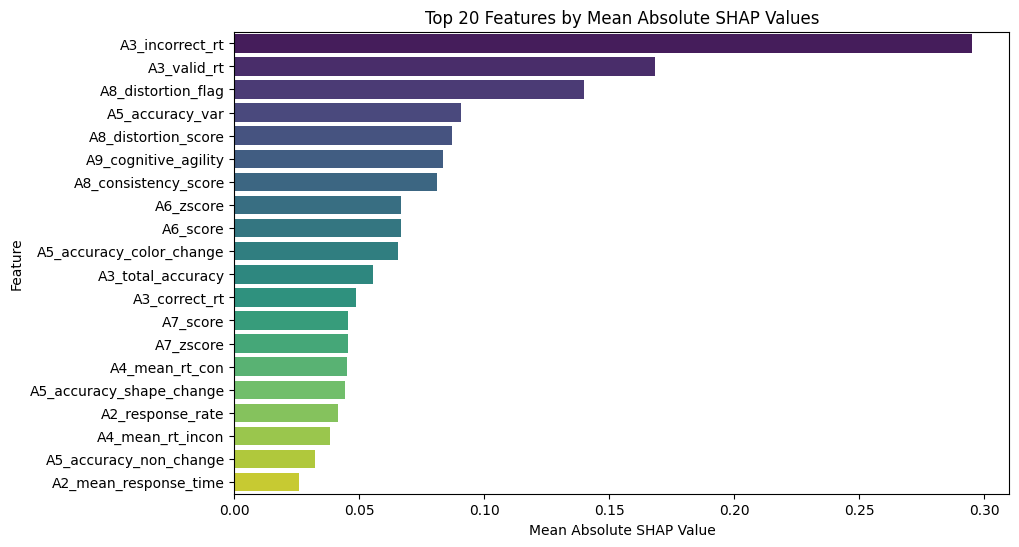

In [ ]:
logreg = LogisticRegression(max_iter=2000)
logreg.fit(x_train_res, y_train_res)

# Feature importance (coefficients)
logreg_importance = pd.Series(np.abs(logreg.coef_[0]), index=feature_cols).sort_values(ascending=False)
print("Logistic Regression Feature Importance:")
print(logreg_importance.head(10))

# SHAP
explainer_logreg = shap.LinearExplainer(logreg, x_train_res, feature_perturbation="interventional")
shap_values_logreg = compute_shap_with_tqdm(explainer_logreg, x_test, batch_size=500)
plot_shap_summary(shap_values_logreg, x_test)

## **Decision Tree**

Decision Tree Feature Importance:
A9_reality_checking      0.747302
A6_score                 0.172167
A6_zscore                0.065180
A8_consistency_score     0.013522
A9_stress_level          0.001279
A9_behavior_stability    0.000550
A1_direction_diff_rt     0.000000
A1_fast_avg_rt           0.000000
A1_response_rate         0.000000
A1_left_response_rate    0.000000
dtype: float64


Computing SHAP values: 100%|██████████| 259/259 [00:00<00:00, 678.94it/s]


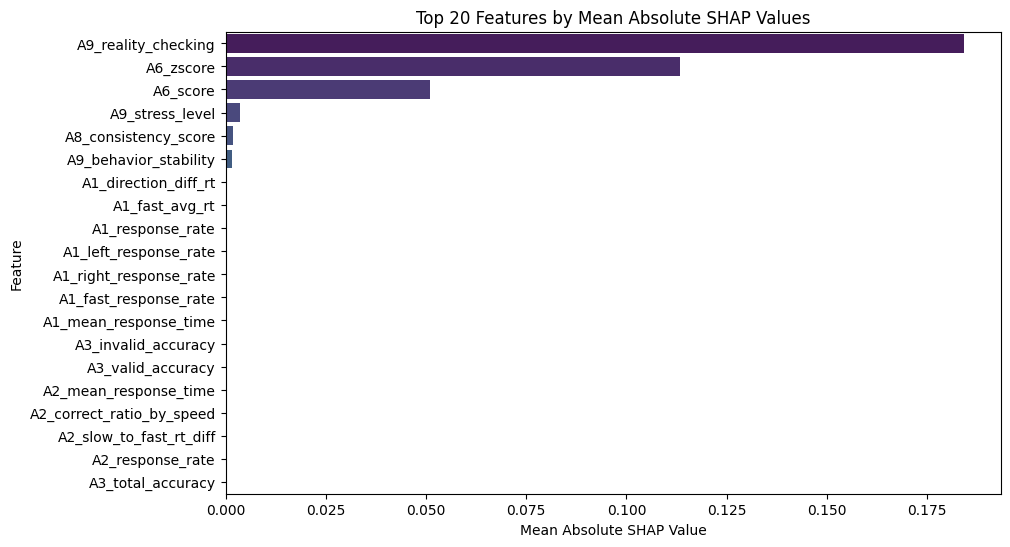

In [ ]:
dtree = DecisionTreeClassifier(max_depth=5, random_state=42)
dtree.fit(x_train_res, y_train_res)

# Feature importance
dtree_importance = pd.Series(dtree.feature_importances_, index=feature_cols).sort_values(ascending=False)
print("Decision Tree Feature Importance:")
print(dtree_importance.head(10))

# SHAP
explainer_tree = shap.TreeExplainer(dtree)
shap_values_tree_all = compute_shap_with_tqdm(explainer_tree, x_test, batch_size=500)

# 클래스 1만 선택
if shap_values_tree_all.ndim == 3:
    shap_values_tree = shap_values_tree_all[:, :, 1]
else:
    shap_values_tree = shap_values_tree_all

plot_shap_summary(shap_values_tree, x_test)


## **Random Forest**

Random Forest Feature Importance:
A9_reality_checking         0.157082
A6_score                    0.113511
A6_zscore                   0.108952
A5_accuracy_non_change      0.102244
A8_consistency_score        0.073238
A7_zscore                   0.053574
A7_score                    0.050507
A5_accuracy_color_change    0.050355
A5_accuracy_shape_change    0.040981
A4_incongruent_accuracy     0.040743
dtype: float64


Computing SHAP values: 100%|██████████| 259/259 [28:36<00:00,  6.63s/it]


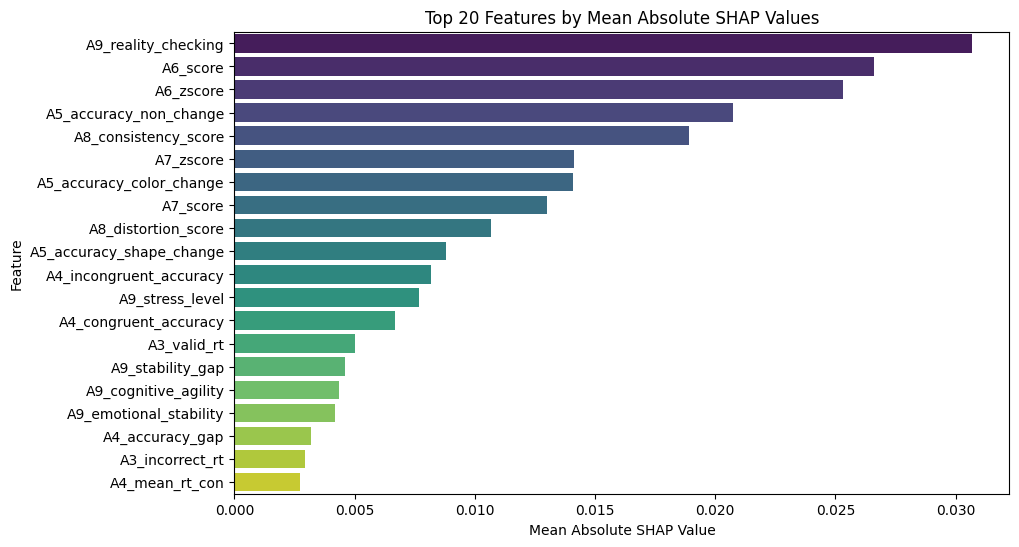

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(x_train_res, y_train_res)

# Feature Importance
rf_importance = pd.Series(rf_model.feature_importances_, index=feature_cols).sort_values(ascending=False)
print("Random Forest Feature Importance:")
print(rf_importance.head(10))

# SHAP
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf_all = compute_shap_with_tqdm(explainer_rf, x_test, batch_size=500)

# 클래스 1만 선택
if shap_values_rf_all.ndim == 3:
    shap_values_rf = shap_values_rf_all[:, :, 1]
else:
    shap_values_rf = shap_values_rf_all

plot_shap_summary(shap_values_rf, x_test)

## **XGBoost**

XGBoost Feature Importance:
A8_consistency_score        0.155851
A9_reality_checking         0.116094
A6_score                    0.106944
A5_accuracy_color_change    0.086225
A5_accuracy_non_change      0.076400
A4_congruent_accuracy       0.063072
A4_incongruent_accuracy     0.049752
A8_distortion_score         0.042623
A9_stress_level             0.041058
A9_stability_gap            0.037919
dtype: float32


Computing SHAP values: 100%|██████████| 259/259 [00:07<00:00, 33.58it/s]


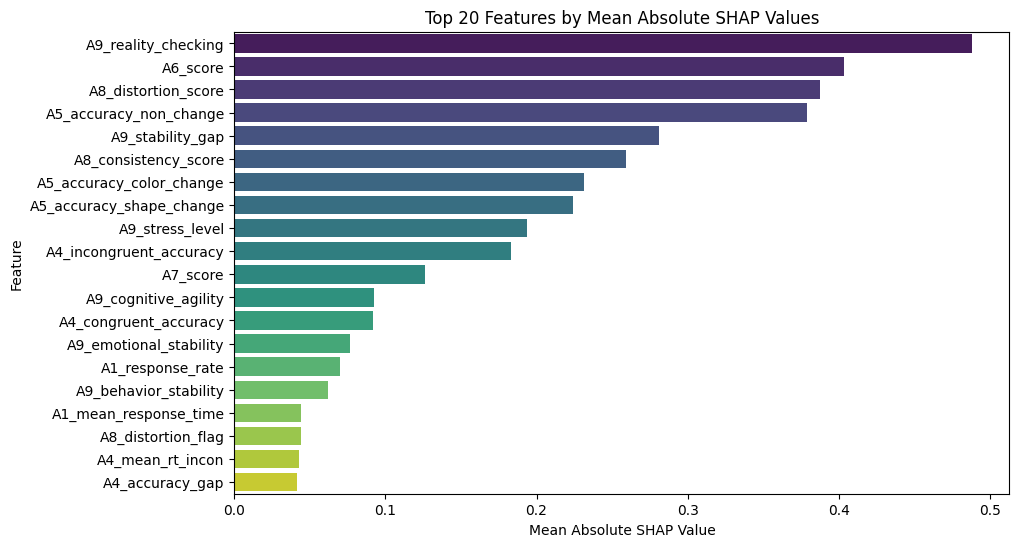

In [ ]:
xgb_model = XGBClassifier(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.05,
    tree_method='gpu_hist',
    gpu_id=0,
    random_state=42,
    eval_metric='logloss'
)
xgb_model.fit(x_train_res, y_train_res)

# Feature importance
xgb_importance = pd.Series(xgb_model.feature_importances_, index=feature_cols).sort_values(ascending=False)
print("XGBoost Feature Importance:")
print(xgb_importance.head(10))

# SHAP
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = compute_shap_with_tqdm(explainer_xgb, x_test, batch_size=500)
plot_shap_summary(shap_values_xgb, x_test)

## **LightGBM**

LightGBM Feature Importance:
A9_reality_checking         1378
A5_accuracy_non_change      1349
A8_distortion_score         1282
A9_stability_gap             960
A5_accuracy_shape_change     758
A6_score                     666
A5_accuracy_color_change     629
A9_stress_level              601
A9_cognitive_agility         593
A6_zscore                    576
dtype: int32


Computing SHAP values: 100%|██████████| 259/259 [00:51<00:00,  5.07it/s]


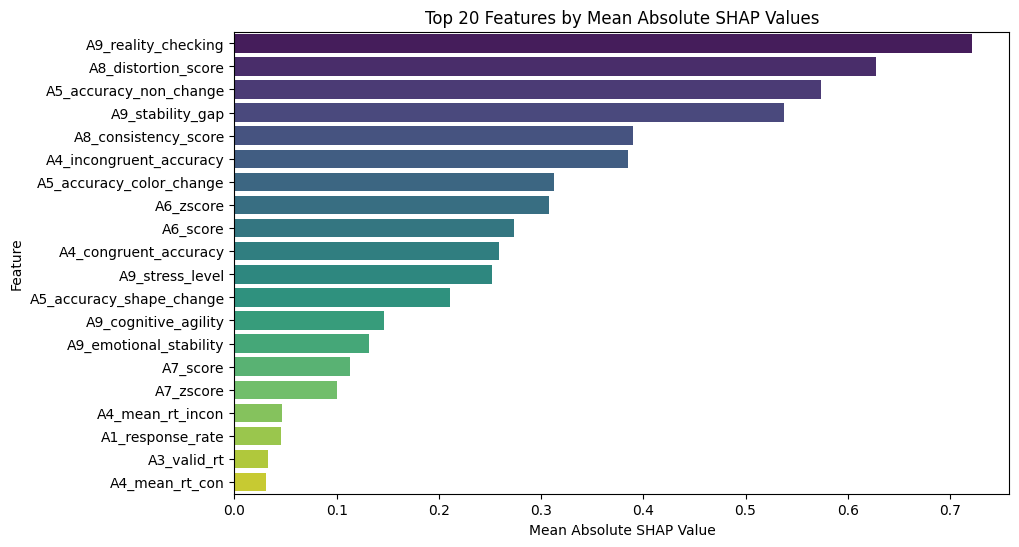

In [ ]:
lgb_model = LGBMClassifier(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.05,
    device='gpu',
    random_state=42,
    verbose=-1
)
lgb_model.fit(x_train_res, y_train_res)

# Feature importance
lgb_importance = pd.Series(lgb_model.feature_importances_, index=feature_cols).sort_values(ascending=False)
print("LightGBM Feature Importance:")
print(lgb_importance.head(10))

# SHAP
explainer_lgb = shap.TreeExplainer(lgb_model)
shap_values_lgb = compute_shap_with_tqdm(explainer_lgb, x_test, batch_size=500)
plot_shap_summary(shap_values_lgb, x_test)

## **DNN**

In [ ]:
input_dim = x_train_res.shape[1]

model = Sequential([
    Dense(128, input_dim=input_dim, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(1e-3), loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    x_train_res.values,
    y_train_res.values,
    epochs=500,          # 충분히 학습할 수 있도록 늘림
    batch_size=1024,
    validation_split=0.2,
    callbacks=[early_stop]
)

Epoch 1/500
791/791 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6577 - loss: 0.6172 - val_accuracy: 0.5231 - val_loss: 0.7529
Epoch 2/500
791/791 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7166 - loss: 0.5511 - val_accuracy: 0.4758 - val_loss: 0.8340
Epoch 3/500
791/791 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7470 - loss: 0.5097 - val_accuracy: 0.5338 - val_loss: 0.7864
Epoch 4/500
791/791 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7694 - loss: 0.4759 - val_accuracy: 0.6136 - val_loss: 0.6878
Epoch 5/500
791/791 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7897 - loss: 0.4462 - val_accuracy: 0.6159 - val_loss: 0.6940
Epoch 6/500
791/791 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8025 - loss: 0.4241 - val_accuracy: 0.7016 - val_loss: 0.5560
Epoch 7/500
791/791 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8162 - loss: 0.4002 - val_accuracy: 0.6992 - val_loss: 0.5602
Epoch 8/500
791/791 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8268 - loss: 0.3819 - val_accu

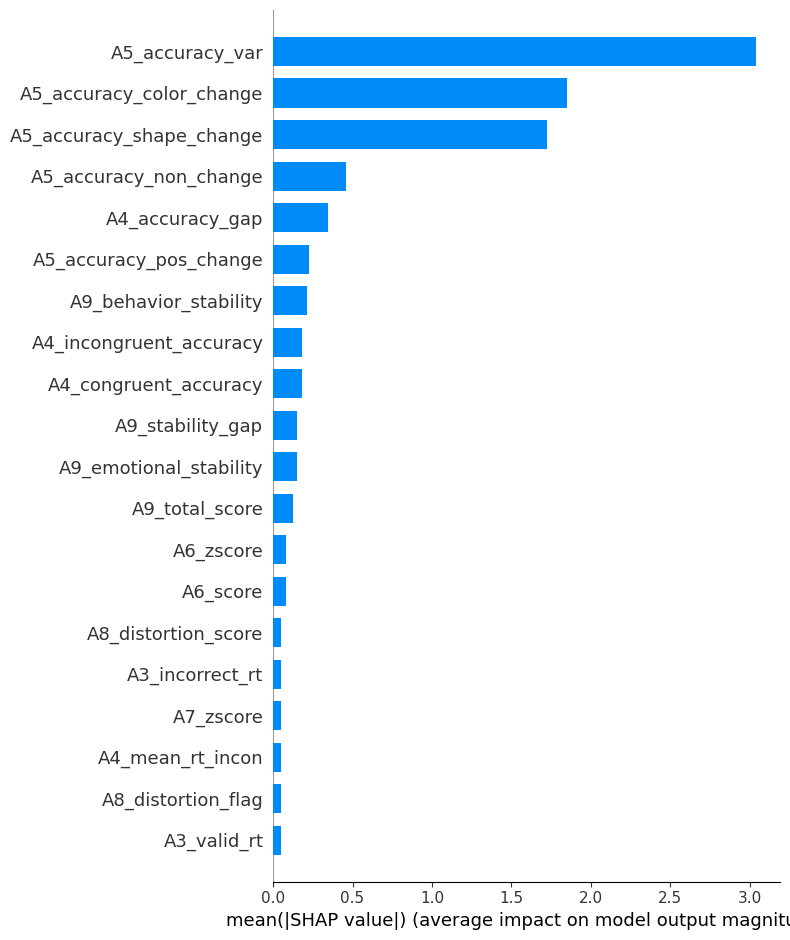

In [ ]:
explainer = shap.DeepExplainer(model, x_train_res[:1000].values)
shap_values_ = explainer.shap_values(x_test[:1000].values)

# 3차원 -> 2차원 변환
shap_values_2d = shap_values_[:,:,0]

# pandas DataFrame 생성
x_test_df = pd.DataFrame(x_test[:1000].values, columns=feature_cols)

# summary_plot - 평균 절댓값 막대 그래프
shap.summary_plot(
    shap_values_2d,
    x_test_df,
    plot_type="bar",
    max_display=20
)